# Feature ideas

1. Group by X0 (and other categorical columns), calculate median/mean, and then cluster these categories into "long/medium/short" testing time cluster groups. Then, add new features like "processed_longtime_car_previously" which are treu if the car before the current car (by id) belongs to a specific cluster... Or, perhaps, distance to last car that was big/medium/small would also work...

# An important clue
There are many near/fully duplicated rows in the train and test sets, and the 1st place Kaggler, Depture, stated in a comment to a discussion post: "Or maybe the thing to do with it [the near-duplicated rows with different testing times] is the key to find the hidden relation explaining the high "outliers" values.

In [1]:
import pandas as pd, numpy as np

In [2]:
seed = 1
np.random.seed(seed)

In [3]:
%matplotlib inline

## Load data

In [4]:
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")
train_df.shape, test_df.shape

((4209, 378), (4209, 377))

In [5]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


# preprocessing

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
# train_input = train_df.drop("ID") First, experiment with keeping id
train_input = train_df.copy()
test_input = test_df.copy()

In [9]:
num_train =len( train_input)
num_train

4209

In [29]:
full_input_combined = pd.concat([train_input, test_input])
full_input_combined.shape

(8418, 378)

In [30]:
full_input = full_input_combined.copy()

In [11]:
categorical_cols = full_input.select_dtypes(include=[np.object]).columns.tolist()
categorical_cols

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [12]:
for c in categorical_cols:
    full_input[c] = LabelEncoder().fit_transform(full_input[c].values)

## Looking at the near-duplicated rows and the outliers

### Near duplicates

In [31]:
dup_ids = [36, 39, 125, 169, 278]
full_input_combined.loc[full_input_combined.ID.isin(dup_ids)]

,ID,X0,X1,X10,X100,X101,X102,X103,X104,X105,...,X91,X92,X93,X94,X95,X96,X97,X98,X99,y
13,36,al,r,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,94.12
16,39,al,r,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,106.10
51,125,al,r,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,93.81
79,169,al,r,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,93.03
130,278,al,r,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,96.88


In [37]:
dup_ids = [36, 39, 125, 169, 278]
full_input_combined.loc[full_input_combined.ID.isin(dup_ids)][categorical_cols + ['ID', 'y']]

,X0,X1,X2,X3,X4,X5,X6,X8,ID,y
13,al,r,e,f,d,j,h,o,36,94.12
16,al,r,e,f,d,j,h,o,39,106.10
51,al,r,e,f,d,j,h,o,125,93.81
79,al,r,e,f,d,j,h,o,169,93.03
130,al,r,e,f,d,j,h,o,278,96.88


### Outliers

In [45]:
full_input_combined.loc[full_input_combined.y > 125].sort_values('ID', ascending=True)[categorical_cols + ['ID', 'y']]

,X0,X1,X2,X3,X4,X5,X6,X8,ID,y
0,k,v,at,a,d,u,j,o,0,130.81
6,al,r,e,f,d,f,h,s,24,128.76
9,j,b,aq,c,d,f,a,e,30,126.99
29,x,b,m,c,d,j,j,n,67,128.19
43,w,s,as,c,d,j,i,q,107,139.20
98,x,b,m,c,d,j,j,n,212,127.66
111,ak,a,as,b,d,j,l,p,234,126.17
203,w,s,as,c,d,i,i,w,416,136.41
216,x,i,as,c,d,i,g,l,433,146.83
223,af,e,as,c,d,i,l,p,449,128.78


In [35]:
full_input_combined.loc[full_input_combined.y > 120].sort_values('y', ascending=False)

,ID,X0,X1,X10,X100,X101,X102,X103,X104,X105,...,X91,X92,X93,X94,X95,X96,X97,X98,X99,y
883,1770,y,r,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,265.32
342,681,aa,l,0,1,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,169.91
1459,2903,ai,b,0,1,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,167.45
3133,6273,aj,v,0,1,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,165.52
1203,2396,j,o,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,160.87
889,1784,aj,l,0,1,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,158.53
2735,5471,x,v,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,158.23
3744,7500,x,f,0,1,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,155.62
429,836,ak,l,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,154.87
1060,2111,w,v,0,1,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,154.43


## Visualizations

### X0 vs testing time (sorted by ID)

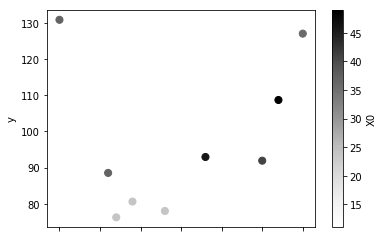

In [23]:
full_input[:10].plot(kind='scatter', x='ID', y='y', c='X0', s=50);

### X1 vs testing time (sorted by ID)

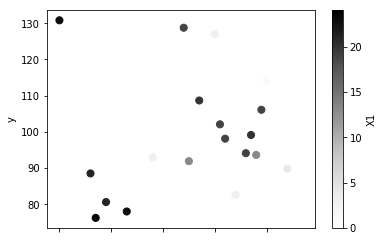

In [25]:
full_input[:20].plot(kind='scatter', x='ID', y='y', c='X1', s=50);

In [19]:
full_input_sorted_by_id = full_input.sort_values('ID')
full_input_sorted_by_id.head()

,ID,X0,X1,X10,X100,X101,X102,X103,X104,X105,...,X91,X92,X93,X94,X95,X96,X97,X98,X99,y
0,0,37,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,130.81
0,1,24,23,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,NaN
1,2,46,3,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,NaN
2,3,24,23,0,1,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,NaN
3,4,24,13,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,NaN


In [20]:
full_input_sorted_by_id.shape

(8418, 378)

In [21]:
# Construct previous categorical & continuous features
for x in full_input_sorted_by_id.columns.tolist():
    for backstep in [1, 2, 3, 4, 5]:#, 6, 7, 8, 9, 10]:
        full_input_sorted_by_id[x + '_prev_' + str(backstep)] = full_input_sorted_by_id[x].shift(backstep).fillna(-1)

In [16]:
# Construct ID-based features
#for div in [2, 3, 4, 5]:
    #full_input_sorted_by_id['ID_mod_' + str(div)] = full_input_sorted_by_id.ID % div

In [22]:
full_input_v2 = full_input_sorted_by_id.copy()

In [23]:
# number of cars since last X, where X is a type of categorical type for each categorical column
# These are distance-like features

# Example:
# If the current car has a value of 37 for its 'X0', 
# then its 'last_X0_distance' would be equal to the index of the last car that had the same 37 value for its 'X0' parameter

## Update: Let's later extend this to all columns (categorical & binary) but the id and label columns, 
## which takes much more time...

for index, row in full_input_sorted_by_id.iterrows():
    print 'Processing # ' + str(index) + '\r',
    
    for c in categorical_cols:#[x for x in full_input.columns.tolist() if x not in ("ID", "y")]:
        current_id = row['ID']
        current_categorical_value = row[c]
        # Get list of all previous cars from this current row
        previous_rows = full_input_sorted_by_id[full_input_sorted_by_id.ID < current_id]
        prev_cars_with_same_cat_feature = sorted(previous_rows[previous_rows[c] == current_categorical_value].ID.astype(int).values.tolist())        
        
        if len(previous_rows) == 0 or len(prev_cars_with_same_cat_feature) == 0:
            # There aren't any previous cars in this category for this categorical feature
            # This type of car (According to this categorical variable hasn't occured yet.)
            full_input_v2.loc[full_input_v2.ID == current_id, 'last_' + c + '_distance'] = 0
        else:
             # Get last previous car that has the same value as the current car for this categorical column
            id_of_last_prev_row_with_same_cat_feature = prev_cars_with_same_cat_feature[-1]
            distance = current_id - id_of_last_prev_row_with_same_cat_feature
            full_input_v2.loc[full_input_v2.ID == current_id, 'last_' + c + '_distance'] = distance

In [24]:
full_input_v2.head()

,ID,X0,X1,X10,X100,X101,X102,X103,X104,X105,...,y_prev_4,y_prev_5,last_X0_distance,last_X1_distance,last_X2_distance,last_X3_distance,last_X4_distance,last_X5_distance,last_X6_distance,last_X8_distance
0,0,37,23,0,0,0,0,0,0,0,...,-1.00,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,1,24,23,0,0,1,0,0,0,0,...,-1.00,-1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,46,3,0,0,1,0,1,0,0,...,-1.00,-1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0
2,3,24,23,0,1,1,0,1,0,0,...,-1.00,-1.0,2.0,2.0,0.0,2.0,1.0,0.0,3.0,0.0
3,4,24,13,0,0,1,0,0,0,0,...,130.81,-1.0,1.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
full_input_v2.drop([c for c in full_input_v2.columns if 'ID_mod' in c], axis=1, inplace=True)

In [28]:
full_input_v2.to_csv("full_input_v2.csv", index=False)

In [29]:
train_input = full_input_v2[full_input_v2.y.notnull()]
test_input = full_input_v2[full_input_v2.y.isnull()]
test_input.drop('y', axis=1,inplace=True)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
train_input.shape, test_input.shape #(x, 466) (x, 465)

((4209, 2276), (4209, 2275))

In [55]:
binary_cols = train_df.select_dtypes(include=[np.int]).drop(["ID"], axis=1).columns.tolist()

## visualizing the ID and y-trends

In [197]:
import seaborn as sns

In [190]:
vis_df = full_input_v2.copy()

In [210]:
vis_df = vis_df.sort_values('y').reset_index(drop=True)

In [211]:
vis_df['ID_2'] = vis_df.index
vis_df[['ID', 'ID_2', 'y'] + categorical_cols].head()

,ID,ID_2,y,X0,X1,X2,X3,X4,X5,X6,X8
0,3185,0,72.11,24,20,19,5,3,4,9,13
1,3747,1,72.50,24,13,38,5,3,8,6,18
2,3616,2,72.94,24,13,38,5,3,5,0,1
3,5865,3,73.02,24,20,38,2,3,22,3,5
4,2902,4,73.15,24,13,38,5,3,3,9,18


In [217]:
train_input2 = vis_df[vis_df.y.notnull()]
test_input2 = vis_df[vis_df.y.isnull()]
test_input2.drop('y', axis=1,inplace=True)
train_input2.shape, test_input2.shape

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


((4209, 2277), (4209, 2276))

In [218]:
train_input2.drop('ID', axis=1, inplace=True)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [229]:
train_input2.tail()

,X0,X1,X10,X100,X101,X102,X103,X104,X105,X106,...,y_prev_5,last_X0_distance,last_X1_distance,last_X2_distance,last_X3_distance,last_X4_distance,last_X5_distance,last_X6_distance,last_X8_distance,ID_2
4204,36,16,0,0,1,0,0,0,0,0,...,121.28,25.0,91.0,1.0,3.0,1.0,1.0,1.0,4.0,4204
4205,9,23,0,1,1,0,1,0,0,0,...,94.62,4.0,7.0,25.0,4.0,1.0,1.0,2.0,28.0,4205
4206,8,3,0,1,1,0,1,0,0,0,...,-1.00,26.0,5.0,14.0,13.0,1.0,1.0,3.0,37.0,4206
4207,1,13,0,1,1,0,1,0,0,0,...,116.04,226.0,7.0,2.0,7.0,1.0,1.0,261.0,32.0,4207
4208,51,19,0,0,1,0,1,0,0,0,...,107.24,40.0,9.0,19.0,9.0,1.0,1.0,14.0,10.0,4208


In [228]:
test_input2.head()

,ID,X0,X1,X10,X100,X101,X102,X103,X104,X105,...,y_prev_5,last_X0_distance,last_X1_distance,last_X2_distance,last_X3_distance,last_X4_distance,last_X5_distance,last_X6_distance,last_X8_distance,ID_2
4209,1,24,23,0,0,1,0,0,0,0,...,-1.00,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4209
4210,2,46,3,0,0,1,0,1,0,0,...,-1.00,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,4210
4211,3,24,23,0,1,1,0,1,0,0,...,-1.00,2.0,2.0,0.0,2.0,1.0,0.0,3.0,0.0,4211
4212,4,24,13,0,0,1,0,0,0,0,...,-1.00,1.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,4212
4213,5,49,20,0,1,1,0,1,0,0,...,130.81,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,4213


In [220]:
import xgboost as xgb

In [221]:
params = {
    'max_depth' : 6,
}

In [222]:
cv_result = xgb.cv(params, xgb.DMatrix(train_input2.drop('y', axis=1), train_input2['y']), 
                   1000, 
                   early_stopping_rounds=10, nfold=5, 
                   seed=1, show_stdv=True, verbose_eval=5)

[0]	train-rmse:70.7896+0.0220638	test-rmse:70.7925+0.0990575
[5]	train-rmse:12.111+0.0467495	test-rmse:12.1319+0.328342
[10]	train-rmse:2.24615+0.07033	test-rmse:2.60276+0.888985
[15]	train-rmse:0.600001+0.0623178	test-rmse:1.46442+1.23285
[20]	train-rmse:0.30993+0.0273889	test-rmse:1.42655+1.34726
[25]	train-rmse:0.230641+0.00815551	test-rmse:1.44223+1.3911


In [223]:
special_id_model = xgb.train(params, xgb.DMatrix(train_input2.drop('y', axis=1), train_input2['y']), len(cv_result))

In [224]:
r2_score(y_pred=special_id_model.predict(xgb.DMatrix(train_input2.drop('y', axis=1))), y_true=train_input2['y'])

0.99919313461895287

In [226]:
kaggle_preds = special_id_model.predict(xgb.DMatrix(test_input2.drop('ID', axis=1)))
kaggle_preds

array([ 239.34680176,  239.34680176,  239.34680176, ...,  239.34680176,
        239.34680176,  239.34680176], dtype=float32)

## model

In [46]:
from sklearn.metrics import r2_score

In [47]:
def eval_r2_score(preds, train_data):
    is_higher_better = True
    labels = train_data.get_label()
    return 'r2', r2_score(labels, preds), is_higher_better

In [97]:
import lightgbm as lgb
import xgboost as xgb

In [180]:
def filter_df(df, is_test=False):
    global categorical_cols, binary_cols
    
    if not is_test:
        x = df.drop(['y'], axis=1)#.replace(-1.0, 0.0).values
        #x = df[categorical_cols + binary_cols + ['ID', 'y_prev_1', 'y_prev_2']]  
    else:
        x = df
        
    if not is_test:
        return x, df['y']
    else:
        return x

In [110]:
train_data = lgb.Dataset(filter_df(train_input)[0], 
                         label=filter_df(train_input)[1],
                         feature_name=filter_df(train_input)[0].columns.tolist(), 
                         categorical_feature=[c for c in filter_df(train_input)[0].columns.tolist()
                                              if any( c == d or d + '_prev' in c for d in categorical_cols + ['ID'])])

In [119]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mse',
    'num_leaves': 2 ** 3,
    'learning_rate': 0.05,
    'feature_fraction': 0.7,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 1
}

In [120]:
cv_results = lgb.cv(params, train_data, 1000, nfold=5, early_stopping_rounds=50, 
       feval=eval_r2_score, seed=seed, verbose_eval=20, shuffle=True)

[20]	cv_agg's l2: 82.2683 + 7.87632	cv_agg's r2: 0.487816 + 0.0318069
[40]	cv_agg's l2: 73.1608 + 8.34156	cv_agg's r2: 0.544684 + 0.0374505
[60]	cv_agg's l2: 72.6963 + 8.74103	cv_agg's r2: 0.547611 + 0.0404718
[80]	cv_agg's l2: 73.0824 + 8.96847	cv_agg's r2: 0.545243 + 0.041772
[100]	cv_agg's l2: 73.5231 + 9.19692	cv_agg's r2: 0.542531 + 0.0430563


In [121]:
params = {
    'max_depth' : 6,
}

In [122]:
cv_result = xgb.cv(params, xgb.DMatrix(filter_df(train_input)[0], filter_df(train_input)[1]), 
                   1000, 
                   early_stopping_rounds=10, nfold=5, 
                   seed=1, show_stdv=True, verbose_eval=5)

[0]	train-rmse:70.9643+0.0588249	test-rmse:70.9716+0.248336
[5]	train-rmse:14.2827+0.0453029	test-rmse:14.6102+0.296562
[10]	train-rmse:7.3072+0.127938	test-rmse:8.64056+0.509303
[15]	train-rmse:6.33195+0.107625	test-rmse:8.44895+0.538323
[20]	train-rmse:5.83002+0.171643	test-rmse:8.49894+0.536189


In [123]:
num_boost = len(cv_result)

In [124]:
model = xgb.train(params, xgb.DMatrix(filter_df(train_input)[0], np.log(filter_df(train_input)[1])), num_boost)

In [125]:
r2_score(y_pred=np.exp(model.predict(xgb.DMatrix(filter_df(train_input)[0]))), y_true=filter_df(train_input)[1])

0.62074964125160204

In [143]:
# Without log transformation
model2 = xgb.train(params, xgb.DMatrix(filter_df(train_input)[0], filter_df(train_input)[1]), num_boost)

In [144]:
r2_score(y_pred=model2.predict(xgb.DMatrix(filter_df(train_input)[0])), y_true=filter_df(train_input)[1])

0.71889830710382296

In [172]:
from scipy.special import inv_boxcox
    
def transform_to_boxcox(vals):
    return boxcox(vals)

In [149]:
from scipy.stats import boxcox

In [173]:
transformed_boxcox_y, transformed_boxcox_lambda = transform_to_boxcox(filter_df(train_input)[1])
transformed_boxcox_lambda

-0.81566227781513334

In [177]:
# With boxcox transformation
model3 = xgb.train(params, xgb.DMatrix(filter_df(train_input)[0], transformed_boxcox_y), num_boost)

In [179]:
r2_score(y_pred= inv_boxcox(model3.predict(xgb.DMatrix(filter_df(train_input)[0])), transformed_boxcox_lambda), 
         y_true=filter_df(train_input)[1])

-0.56301858179024467

In [106]:
def my_plot_importance(booster, figsize, **kwargs): 
    from matplotlib import pyplot as plt
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return xgb.plot_importance(booster=booster, ax=ax, **kwargs)

## Kaggle predictions

In [186]:
kaggle_preds = model2.predict(xgb.DMatrix(filter_df(test_input, is_test=True)))
kaggle_preds

array([  96.79109192,   99.84117889,   82.05444336, ...,   91.02639771,
        108.52351379,   92.34650421], dtype=float32)

In [187]:
test_df['y'] = kaggle_preds
test_df[['ID', 'y']].head()

,ID,y
0,1,96.791092
1,2,99.841179
2,3,82.054443
3,4,78.452492
4,5,114.267494


In [188]:
test_df[['ID', 'y']].to_csv("../data/lightgbm_v2_withsometemporalmagicfeatures.csv", index=False)